In [78]:
import os
import pandas as pd
import numpy as np



# Iterate over each .csv file and load it into a DataFrame
agent_dataframes, collective_dataframes, market_dataframes = [], [], []
#use os.listdir to get the list of files in the directory
#use this below: C:\Users\ELhuillier\OneDrive - Harrisburg University\Computational Devecology\Sim_results\First trial
path = 'C:\\Users\\ELhuillier\\OneDrive - Harrisburg University\\Computational Devecology\\Sim_results\\First trial\\'
for file in os.listdir(path):
    df = pd.read_csv(path+file)
    if 'agent' in file:
        agent_dataframes.append(df)
    elif 'collective' in file:
        collective_dataframes.append(df)
    elif 'market' in file:
        market_dataframes.append(df)


In [25]:
# Concatenate the DataFrames into a single DataFrame
a = 0
for dataframes in [agent_dataframes, collective_dataframes, market_dataframes]:
    combined_df = pd.concat(dataframes)
    a += 1
    if a == 1:
        combined_df.to_csv('C:\\Users\\ELhuillier\\OneDrive - Harrisburg University\\Computational Devecology\\Sim_results\\First trial\\combined_agent.csv')
    elif a == 2:
        combined_df.to_csv('C:\\Users\\ELhuillier\\OneDrive - Harrisburg University\\Computational Devecology\\Sim_results\\First trial\\combined_collective.csv')
    elif a == 3:
        combined_df.to_csv('C:\\Users\\ELhuillier\\OneDrive - Harrisburg University\\Computational Devecology\\Sim_results\\First trial\\combined_market.csv')


In [35]:
market_df = pd.read_csv('C:\\Users\\ELhuillier\\OneDrive - Harrisburg University\\Computational Devecology\\Sim_results\\First trial\\combined_market.csv')
market_df.head(150)

,Unnamed: 0.1,Unnamed: 0,products,tastes_group_youth_mid,tastes_group_mid_old,tastes_group_youth_old,best_products_top_10,best_products_rest,time,sim_n
0,0,0,40,-0.092760,0.074810,-0.111965,533.3,292.366667,0,1
1,1,1,40,-0.072374,0.070493,-0.081015,535.7,286.600000,1,1
2,2,2,40,-0.063068,0.095556,-0.065221,537.2,289.866667,2,1
3,3,3,40,-0.042327,0.083640,-0.092742,543.8,292.300000,3,1
4,4,4,40,-0.067144,0.096097,-0.100500,519.2,295.266667,4,1
...,...,...,...,...,...,...,...,...,...,...
145,145,145,40,-0.075628,0.371653,0.243166,473.9,224.800000,145,1
146,146,146,40,-0.057582,0.382133,0.255560,461.3,225.066667,146,1
147,147,147,40,-0.073690,0.385190,0.257378,429.4,205.666667,147,1
148,148,148,40,-0.071367,0.388045,0.256674,431.5,200.933333,148,1


<Figure size 1200x600 with 0 Axes>

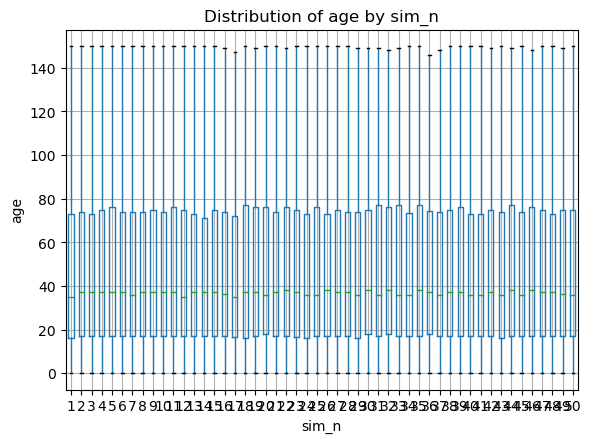

<Figure size 1200x600 with 0 Axes>

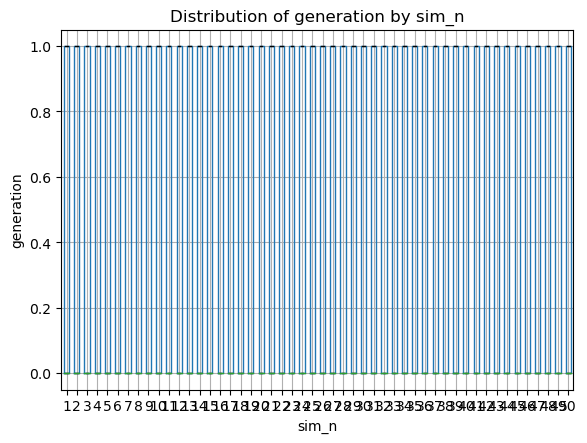

<Figure size 1200x600 with 0 Axes>

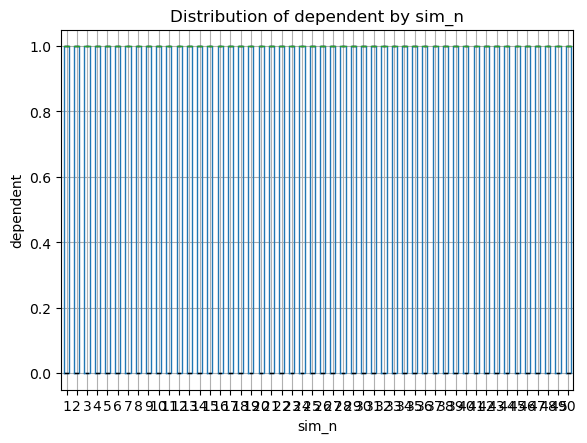

<Figure size 1200x600 with 0 Axes>

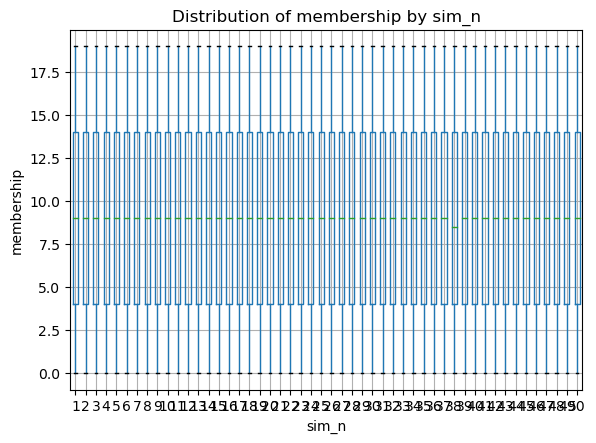

In [34]:
import matplotlib.pyplot as plt

# List of columns to analyze (excluding identifiers and non-numerical data)
columns_to_analyze = ['age', 'generation', 'dependent', 'membership']

# Create box plots for each column to compare distributions
for column in columns_to_analyze:
    plt.figure(figsize=(12, 6))
    agents_df.boxplot(column=column, by='sim_n')
    plt.title(f'Distribution of {column} by sim_n')
    plt.suptitle('')
    plt.xlabel('sim_n')
    plt.ylabel(column)
    plt.show()


<Figure size 1200x600 with 0 Axes>

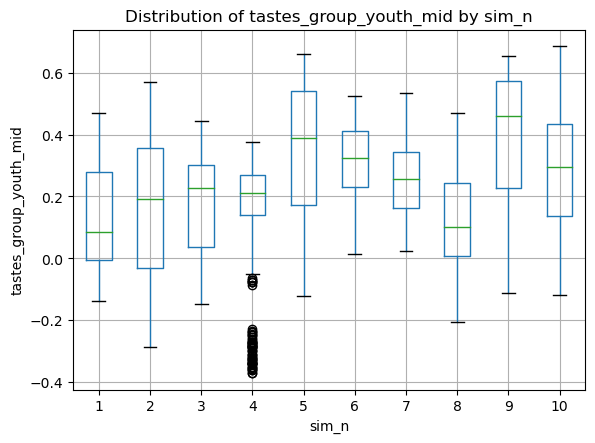

In [38]:
# For each column, calculate the mean and standard deviation for each for all usim_n

In [63]:
#Load market_df

market_df = pd.read_csv('C:\\Users\\ELhuillier\\OneDrive - Harrisburg University\\Computational Devecology\\Sim_results\\First trial\\combined_market.csv')

#Create a dataframe with the values of each column in all the sim_n (it will contain n columns with the same variable).

#Create a dictionary to store the dataframes for each variable
var_df = {}
for var in market_df.columns:
    var_df[var] = pd.DataFrame([list(market_df[var][market_df.sim_n == i])[1:] for i in list(set(market_df['sim_n']))]).transpose()

    



In [84]:
def get_mean_std_df(market_df):
    #get mean and std dev for all variables per time step
    df_mean = {k:[] for k in market_df.columns}
    df_std = {k:[] for k in market_df.columns}
    for col_ in market_df.columns:
        for t in range(0,346+1):
            df_mean[col_].append(np.mean(market_df[market_df.time == t][col_]))
            df_std[col_].append(np.std(market_df[market_df.time == t][col_]))

    #Create a dataframe with the mean and std dev for all variables per time step
    df_mean = pd.DataFrame(df_mean)
    df_std = pd.DataFrame(df_std)

    return df_mean, df_std


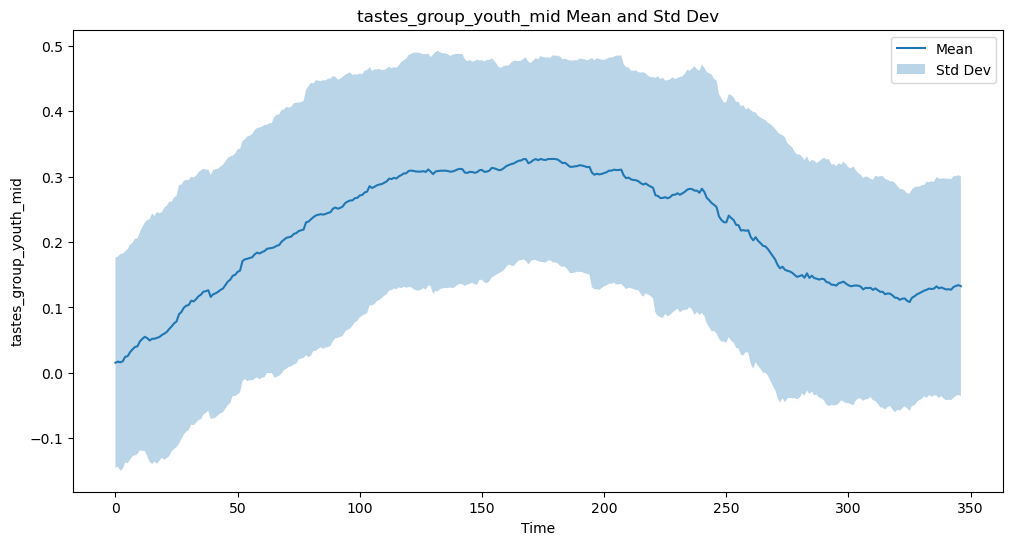

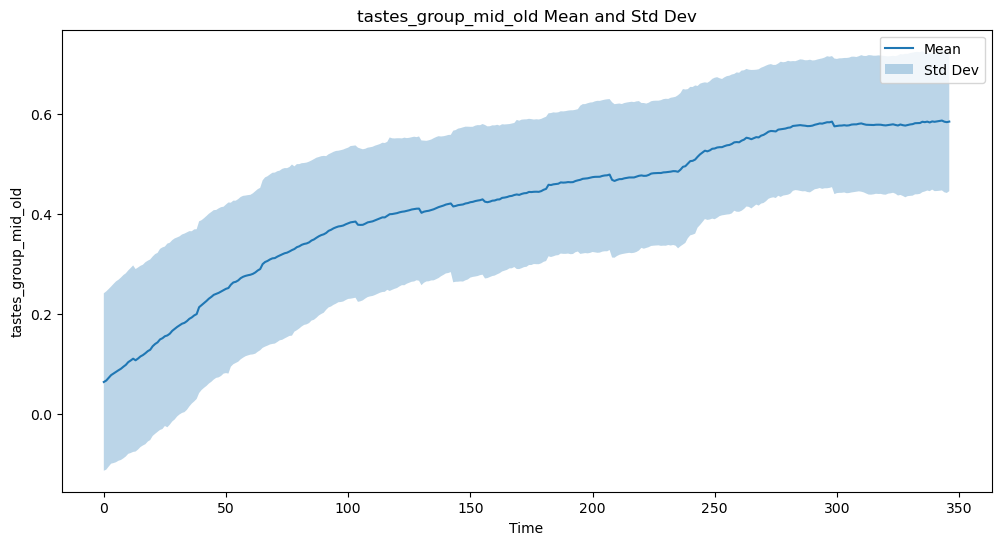

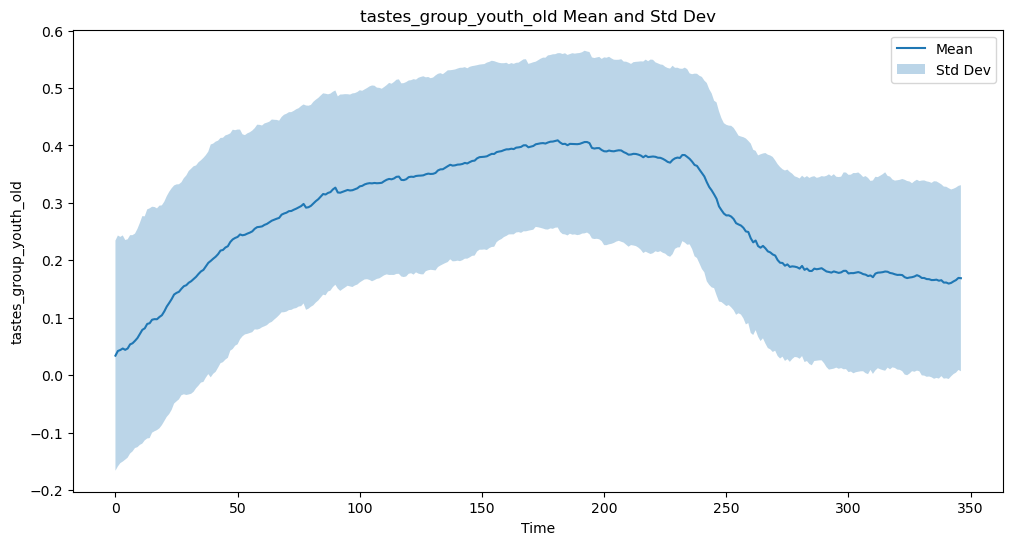

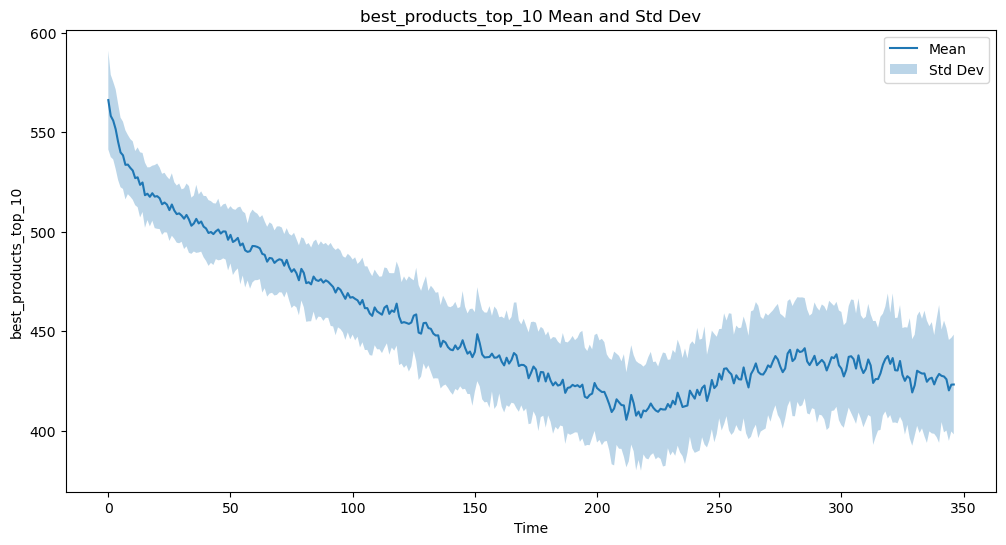

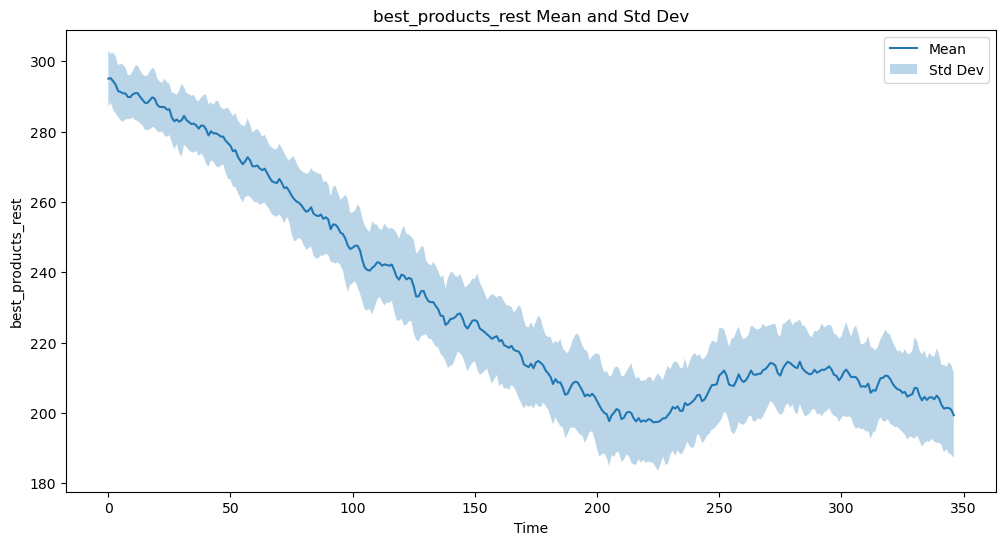

In [85]:
#For each variable plot a time series with the mean and std deviation (above and below)
#look at the name of the columns of df_mean: 
key_parameters = ['tastes_group_youth_mid',
       'tastes_group_mid_old', 'tastes_group_youth_old',
       'best_products_top_10', 'best_products_rest']

df_mean, df_std = get_mean_std_df(market_df)

for col_ in key_parameters:
    plt.figure(figsize=(12, 6))
    plt.plot(df_mean[col_], label = 'Mean')
    plt.fill_between(range(0,347), np.array(df_mean[col_]) - np.array(df_std[col_]), np.array(df_mean[col_]) + np.array(df_std[col_]), alpha = 0.3, label = 'Std Dev')
    plt.title(f'{col_} Mean and Std Dev')
    plt.xlabel('Time')
    plt.ylabel(col_)
    plt.legend()
    plt.show()


#Create another figure like above, but now we will take 3 sub-samples of the data and plot the mean and std dev for each of them

import random as rd 




